单变量线性回归

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
path = 'ex1data1.txt'
dataset = pd.read_csv(path,header = None,names = ['Population','Price'])
dataset.head()

,Population,Price
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


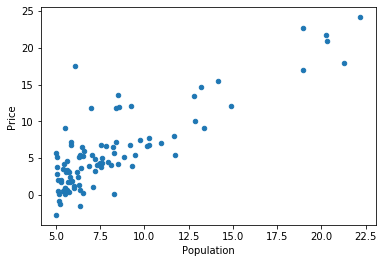

In [92]:
dataset.plot(kind = 'scatter',x = 'Population',y = 'Price')

In [93]:
def ComputeCost(X,y,theta):
    cost = np.power((X * theta.T)-y,2)
    return np.sum(cost)/(len(X) * 2)

In [94]:
dataset.insert(0,'Ones',1)
dataset.head()

,Ones,Population,Price
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [95]:
cols = dataset.shape[1]

In [96]:
X = dataset.iloc[:,0:cols-1]
Y = dataset.iloc[:,cols-1:cols]

In [97]:
X = np.matrix(X)
Y = np.matrix(Y)

In [98]:
theta = np.matrix(np.array([0,0]))
cost = ComputeCost(X,Y,theta)
cost

32.072733877455676

梯度下降

In [99]:
def GradientDescent(X,Y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for idx in range(iters):
        d = (X * theta.T) - Y

        for j in range(parameters):
            term = np.multiply(d,X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[idx] = ComputeCost(X,Y,theta)

    return theta,cost

In [100]:
alpha = 0.01
iters = 1000

In [101]:
theta,cost = GradientDescent(X,Y,theta,alpha,iters)

In [102]:
ComputeCost(X,Y,theta)

4.515955503078914

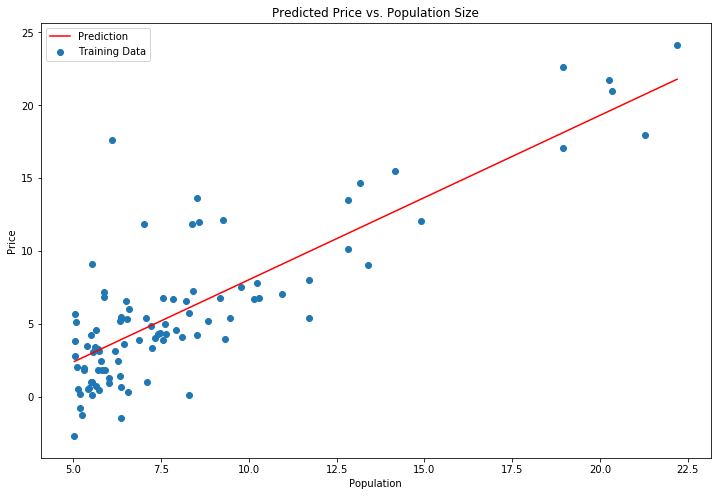

In [103]:
x = np.linspace(dataset.Population.min(),dataset.Population.max(),100)
pre = theta[0,0] + (theta[0,1]* x)

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(x,pre,'r',label = 'Prediction')
ax.scatter(dataset.Population,dataset.Price,label = 'Training Data')
ax.legend(loc = 2)
ax.set_xlabel('Population')
ax.set_ylabel('Price')
ax.set_title('Predicted Price vs. Population Size')
plt.show()

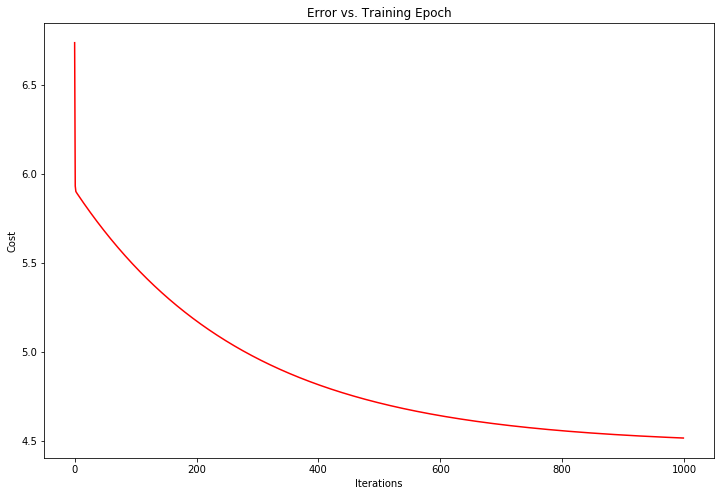

In [104]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

多元线性回归

In [105]:
path = 'ex1data2.txt'
data = pd.read_csv(path,header = None,names = ['Size','Bedroom','Price'])
data.head()

,Size,Bedroom,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


特征归一化：如不进行特征归一化，则无法收敛

In [106]:
data = (data - data.mean())/data.std()
data.head()

,Size,Bedroom,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [107]:
data.insert(0,'Ones',1)
data.head()

,Ones,Size,Bedroom,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [108]:
cols = data.shape[1]
X = np.matrix(data.iloc[:,0:cols-1])
Y = np.matrix(data.iloc[:,cols-1:cols])
M_theta = np.matrix(np.array([0,0,0]))

In [109]:
cost = ComputeCost(X,Y,M_theta)

In [110]:
M_alpha = 0.01
M_iters = 1000

In [111]:
M_theta,M_cost = GradientDescent(X,Y,M_theta,M_alpha,M_iters)

In [112]:
M_theta

matrix([[-1.03191687e-16,  8.78503652e-01, -4.69166570e-02]])

In [113]:
ComputeCost(X,Y,M_theta)

0.13070336960771892

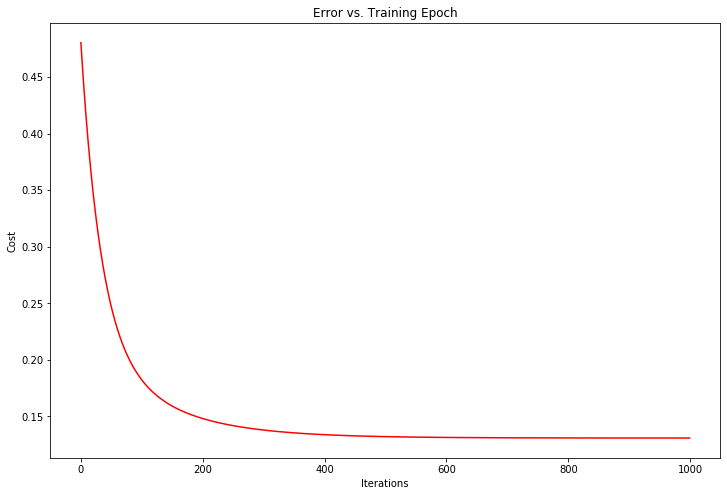

In [114]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(M_iters), M_cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

正规方程

In [115]:
def normalEqu(X,Y):
    theta = np.linalg.inv(X.T@X)@X.T@Y
    return theta

In [116]:
theta_nE = normalEqu(X,Y)
theta_nE

matrix([[-1.04083409e-16],
        [ 8.84765988e-01],
        [-5.31788197e-02]])